In [361]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [362]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [363]:
df=pd.read_csv("Test_Data (1).csv",parse_dates=['date'])

In [364]:
df = df.loc[:, df.columns.intersection(['date','new_case'])]

In [365]:
df.dropna(inplace=True)

In [366]:
df.set_index('date',inplace=True)

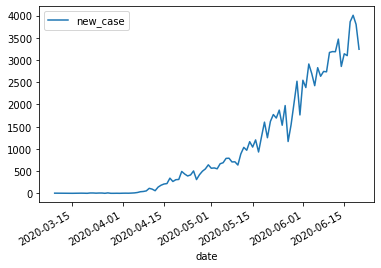

In [188]:
df.plot()

In [142]:
i=int(len(df.index)*0.8)

In [143]:
train = df.iloc[0:i]
test = df.iloc[i:]

In [168]:
train=df

In [69]:
df

,date,new_case
5,2020-03-09,3.0
11,2020-03-15,0.0
13,2020-03-17,2.0
14,2020-03-18,3.0
15,2020-03-19,2.0
...,...,...
104,2020-06-16,3099.0
105,2020-06-17,3862.0
106,2020-06-18,4008.0
107,2020-06-19,3803.0


In [169]:
train['ds'] =train.index
train['y']=train['new_case']

In [170]:
train.drop(['new_case'], axis=1,inplace=True)

In [171]:
train

,ds,y
date,,
2020-03-09,2020-03-09,3.0
2020-03-15,2020-03-15,0.0
2020-03-17,2020-03-17,2.0
2020-03-18,2020-03-18,3.0
2020-03-19,2020-03-19,2.0
...,...,...
2020-06-16,2020-06-16,3099.0
2020-06-17,2020-06-17,3862.0
2020-06-18,2020-06-18,4008.0


In [82]:
df['new_case']

5         3.0
11        0.0
13        2.0
14        3.0
15        2.0
        ...  
104    3099.0
105    3862.0
106    4008.0
107    3803.0
108    3243.0
Name: new_case, Length: 98, dtype: float64

In [113]:
train['y'] = np.log(train['y'])

In [114]:
train=train.replace([np.inf, -np.inf], np.nan).dropna()

In [126]:
train

,ds,y
date,,
2020-03-09,2020-03-09,1.098612
2020-03-17,2020-03-17,0.693147
2020-03-18,2020-03-18,1.098612
2020-03-19,2020-03-19,0.693147
2020-03-21,2020-03-21,1.945910
...,...,...
2020-05-27,2020-05-27,7.061334
2020-05-28,2020-05-28,7.340187
2020-05-29,2020-05-29,7.615298


In [174]:
m1 = Prophet(daily_seasonality=True)
m1.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [175]:
future1 = m1.make_future_dataframe(periods=10,freq='D')
forecast1 = m1.predict(future1)

In [176]:
pred=forecast1[['yhat']]

In [179]:
p=pred.tail(10)

In [247]:
p

,yhat
98,3599.933862
99,3761.668417
100,3863.875841
101,3941.055999
102,4041.089138
103,4079.691262
104,4162.575979
105,4093.358809
106,4255.093363
107,4357.300787


In [248]:
p.to_csv('Covid_19_Forecast.csv')

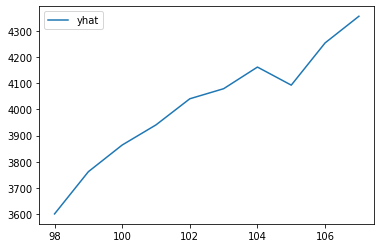

In [181]:
p.plot()

In [1]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

In [3]:
from sklearn.metrices import mean_squared_error

ModuleNotFoundError: No module named 'sklearn.metrices'

In [189]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [193]:
model = SARIMAX(df,order = (1, 1, 1),seasonal_order =(2, 1, 1, 12)) 

result = model.fit() 
start = len(train) 
end = len(train) +10 - 1

In [194]:
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

In [249]:
predictions

98     3588.338508
99     3864.063405
100    4117.314324
101    3920.167938
102    4217.378095
103    4010.476235
104    4327.286552
105    4237.904444
106    4468.479859
107    4589.719968
Name: Predictions, dtype: float64

In [266]:
pp=pd.read_csv('Covid_19_Forecast.csv')

In [257]:
pp['Arima']=np.array(predictions)

In [302]:
pp['Date']=np.array(dates)

In [303]:
pp

,Unnamed: 0,Unnamed: 0.1,yhat,Arima,Date
0,0,98,3599.933862,3588.338508,2020-06-21
1,1,99,3761.668417,3864.063405,2020-06-22
2,2,100,3863.875841,4117.314324,2020-06-23
3,3,101,3941.055999,3920.167938,2020-06-24
4,4,102,4041.089138,4217.378095,2020-06-25
5,5,103,4079.691262,4010.476235,2020-06-26
6,6,104,4162.575979,4327.286552,2020-06-27
7,7,105,4093.358809,4237.904444,2020-06-28
8,8,106,4255.093363,4468.479859,2020-06-29
9,9,107,4357.300787,4589.719968,2020-06-30


In [304]:
pp.to_csv('Covid_19_Forecast.csv')

In [196]:
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pylab as plt

In [286]:
df

,date,new_case
5,2020-03-09,3.0
11,2020-03-15,0.0
13,2020-03-17,2.0
14,2020-03-18,3.0
15,2020-03-19,2.0
...,...,...
104,2020-06-16,3099.0
105,2020-06-17,3862.0
106,2020-06-18,4008.0
107,2020-06-19,3803.0


In [287]:
avg=list(df['new_case'])

In [288]:
res = pd.Series(avg, index=df['date'])

In [289]:
res

date
2020-03-09       3.0
2020-03-15       0.0
2020-03-17       2.0
2020-03-18       3.0
2020-03-19       2.0
               ...  
2020-06-16    3099.0
2020-06-17    3862.0
2020-06-18    4008.0
2020-06-19    3803.0
2020-06-20    3243.0
Length: 98, dtype: float64

In [321]:
df1=np.log(df)
df1=df1.replace([np.inf, -np.inf], np.nan).dropna()

In [331]:
df2=np.log(df1)
df2=df2.replace([np.inf, -np.inf], np.nan).dropna()

In [333]:
df2

,new_case
date,
2020-03-09,0.094048
2020-03-17,-0.366513
2020-03-18,0.094048
2020-03-19,-0.366513
2020-03-21,0.665730
...,...
2020-06-16,2.084284
2020-06-17,2.111296
2020-06-18,2.115779


In [291]:
ts_diff = ts - ts.shift()
ts_diff=ts_diff.replace([np.inf, -np.inf], np.nan).dropna()


In [292]:
ts_diff

date
2020-03-17   -0.405465
2020-03-18    0.405465
2020-03-19   -0.405465
2020-03-21    1.252763
2020-03-22    0.000000
                ...   
2020-06-16   -0.013462
2020-06-17    0.220106
2020-06-18    0.037107
2020-06-19   -0.052502
2020-06-20   -0.159291
Length: 91, dtype: float64

In [356]:
r = ARIMA(df1,(0,0,2))
r = r.fit(disp=-1)

In [357]:
pred = r.predict(start=len(df1),end=(len(df1)+10-1))
dates = pd.date_range('2020-06-21','2020-06-30',freq='D')

In [358]:
len(pred)

10

In [359]:
pred

92     7.291902
93     6.360734
94     5.736554
95     5.736554
96     5.736554
97     5.736554
98     5.736554
99     5.736554
100    5.736554
101    5.736554
dtype: float64

In [350]:
predictions_ARIMA = np.exp(pred)

In [351]:
predictions_ARIMA

91     1.155410
92     1.062034
93     1.087156
94     1.080128
95     1.082073
96     1.081533
97     1.081683
98     1.081641
99     1.081653
100    1.081649
dtype: float64

In [232]:
import pandas as pd

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2020-06-20 00:00:00'), 0], dtype=object)

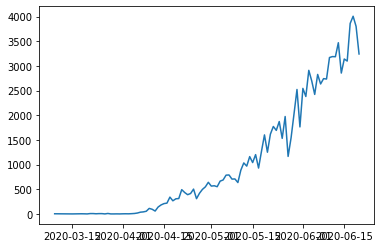

In [310]:
predictions_ARIMA_diff = pd.Series(pred, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts.iloc[0])
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(res)
plt.plot(predictions_ARIMA)

plt.show()


In [311]:
predictions_ARIMA

2020-06-20 00:00:00    1.219915
0                      3.000000
dtype: float64

In [406]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [407]:
y_hat_avg=pd.DataFrame()

In [408]:
fit1 = ExponentialSmoothing(np.asarray(df['new_case']) ,seasonal_periods=70,damped=False, seasonal='add').fit()
#y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))
y_hat_avg['Holt_Winter']=fit1.predict(len(df),len(df)+9)

In [409]:
y_hat_avg['Holt_Winter']

0    3297.923532
1    3379.944773
2    3403.015812
3    3431.894523
4    3460.530185
5    3597.659754
6    3530.124512
7    3572.926315
8    3579.790124
9    3760.050013
Name: Holt_Winter, dtype: float64

In [410]:
pp=pd.read_csv('Covid_19_Forecast.csv',parse_dates=['date'])

In [411]:
pp['Holt_winter']=np.array(y_hat_avg['Holt_Winter'])

In [413]:
pp.to_csv('Covid_19_Forecast.csv')

In [414]:
pp

,Unnamed: 0,Prophet,Arima,Date,Holt_winter
0,0,3599.933862,3588.338508,21-06-20,3297.923532
1,1,3761.668417,3864.063405,22-06-20,3379.944773
2,2,3863.875841,4117.314324,23-06-20,3403.015812
3,3,3941.055999,3920.167938,24-06-20,3431.894523
4,4,4041.089138,4217.378095,25-06-20,3460.530185
5,5,4079.691262,4010.476235,26-06-20,3597.659754
6,6,4162.575979,4327.286552,27-06-20,3530.124512
7,7,4093.358809,4237.904444,28-06-20,3572.926315
8,8,4255.093363,4468.479859,29-06-20,3579.790124
9,9,4357.300787,4589.719968,30-06-20,3760.050013


In [416]:
pp=pd.read_csv('Covid_19_Forecast.csv',parse_dates=['Date'])

In [418]:
pp.set_index('Date',inplace=True)

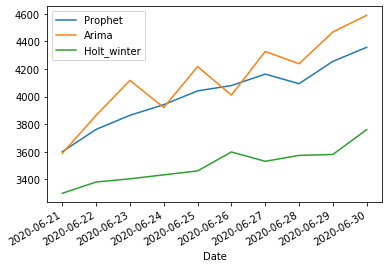

In [419]:
pp.plot()